In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.sparse.linalg
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

Made complete linearly seprable dataset

In [ ]:
X, y = datasets.make_blobs(

        n_samples = 1500,
        n_features = 2,
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

y = np.where(y == 0, -1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

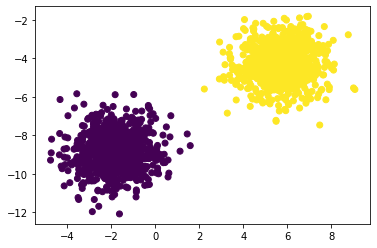

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
C = 1.0

In [ ]:
def lossval(w, b, x, y):
    reg = 0.5 * (w * w)

    for i in range(x.shape[0]):
        opt_term = y[i] * ((np.dot(w, x[i])) + b)

        loss = reg + C * max(0, 1-opt_term)
    return loss[0][0]

In [ ]:
def fit(X, Y, batch_size=100, learning_rate=0.001, epochs=1000):

    number_of_features = X.shape[1]
    number_of_samples = X.shape[0]

    c = C
    ids = np.arange(number_of_samples)

    np.random.shuffle(ids)
    w = np.zeros((1, number_of_features))
    b = 0
    losses = []


    for i in range(epochs):
        l = lossval(w, b, X, Y)
        losses.append(l)


        for batch_initial in range(0, number_of_samples, batch_size):
            gradw = 0
            gradb = 0

            for j in range(batch_initial, batch_initial + batch_size):
                if j < number_of_samples:
                    x = ids[j]
                    ti = Y[x] * (np.dot(w, X[x].T) + b)

                    if ti > 1:
                        gradw += 0
                        gradb += 0
                    else:
                        gradw += c * Y[x] * X[x]
                        gradb += c * Y[x]

            w = w - learning_rate * w + learning_rate * gradw
            b = b + learning_rate * gradb

    return w, b, losses

In [ ]:
def predict(X):

    prediction = np.dot(X, w[0]) + b
    return np.sign(prediction)

In [ ]:
w, b, losses = fit(X_train, y_train)


In [ ]:
w

array([[    4.63296273, -2641.88853181]])

In [ ]:
b

array([-31.726])

In [ ]:
prediction = predict(X_test)

lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

Loss: 13.009752622193318
Prediction: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
Accuracy: 0.9
w, b: [array([[    4.63296273, -2641.88853181]]), array([-31.726])]


Running on inbuilt classical given svm in sklearn lib

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
X_train

,0,1
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
y_train

,0
336,1
64,-1
55,-1
106,-1
300,1
...,...
323,1
192,-1
117,-1
47,-1


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train[0].to_list())

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[77  2]
 [23 18]]


0.7916666666666666